<html>
<body>
<h1 style="background-color: #022851;">
<center>
<br><font size="+2">
<font color=#FFBF00><b>Data Analysis Project</b></font>
</font>
<br><font size="+1.5">
<font color=#FFBF00><b>Python for Data Analysis   |   UC Davis CPE   |   Sports Group</b></font>
</font>
<br>
</center>
<font size="+1">
<font color=#FFBF00>
<b>Group Members -</b>
<ul style="text-align: left;">
<li><b>Kyle Andrews</b></li>
<li><b>Joshua Darilek</b></li>
<li><b>Austin Maguire</b></li>
<li><b>Rene Espinoza Pacheco</b></li>
</ul>
</font>
</font>
</h1>
</body>
</html>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Import dataset regardless of environment or operating system

# Go up one level from the current directory, then into the data folder
file_path = Path('..') / 'data' / '2023_nba_player_stats.csv'

# Print the file path to verify
print(f"Attempting to read file from: {file_path.resolve()}")

# Read the CSV file
nba_player_stats = pd.read_csv(file_path)

Attempting to read file from: /Users/austinmaguire/ucdavis_cpe_python/NBA_Stats_Data_Analysis_Project/data/2023_nba_player_stats.csv


Dataset Information from - 
https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season

| Column | Description |
|--------|-------------|
| `PName` | The name of the basketball player |
| `POS` | The player's position in the game, including 'N/A' |
| `Team` | The abbreviation of the team the player is currently playing for this season |
| `Age` | The age of the player |
| `GP` | The total number of games the player has played in this season |
| `W` | The total number of games won by the player |
| `L` | The total number of games lost by the player |
| `Min` | The total minutes the player has played in this season |
| `PTS` | **The total points made by the player [target]** |
| `FGM` | The total number of field goals made by the player |
| `FGA` | The total number of field goals attempted by the player |
| `FG%` | The percentage of successful field goals made by the player |
| `3PM` | The total number of 3-point field goals made by the player |
| `3PA` | The total number of 3-point field goals attempted by the player |
| `3P%` | The percentage of successful 3-point field goals made by the player |
| `FTM` | The total number of free throws made by the player |
| `FTA` | The total number of free throws attempted by the player |
| `FT%` | The percentage of successful free throws made by the player |
| `OREB` | The total number of offensive rebounds made by the player |
| `DREB` | The total number of defensive rebounds made by the player |
| `REB` | The total number of rebounds (offensive + defensive) made by the player |
| `AST` | The total number of assists made by the player |
| `TOV` | The total number of turnovers made by the player |
| `STL` | The total number of steals made by the player |
| `BLK` | The total number of blocks made by the player |
| `PF` | The total number of personal fouls made by the player |
| `FP` | The total number of NBA fantasy points made by the player |
| `DD2` | The total number of double-doubles made by the player |
| `TD3` | The total number of triple-doubles made by the player |
| `+/-` | The total difference between the player's team scoring and the opponents' scoring while the player is in the game |

In [3]:
# Check for missing values
null_counts = nba_player_stats.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f"{count} rows in column {column} are null")

# Display information about the dataset
print(nba_player_stats.info())

# Calculate and display basic statistics for numerical columns
print(nba_player_stats.describe())

5 rows in column POS are null
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     5

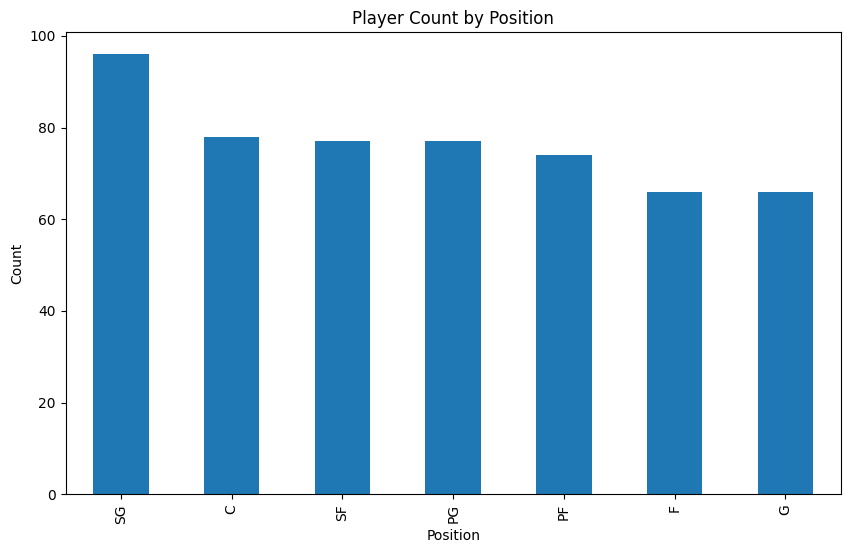

In [4]:
# Visualize distribution of positions
plt.figure(figsize=(10,6))
nba_player_stats['POS'].value_counts().plot(kind='bar')
plt.title('Player Count by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

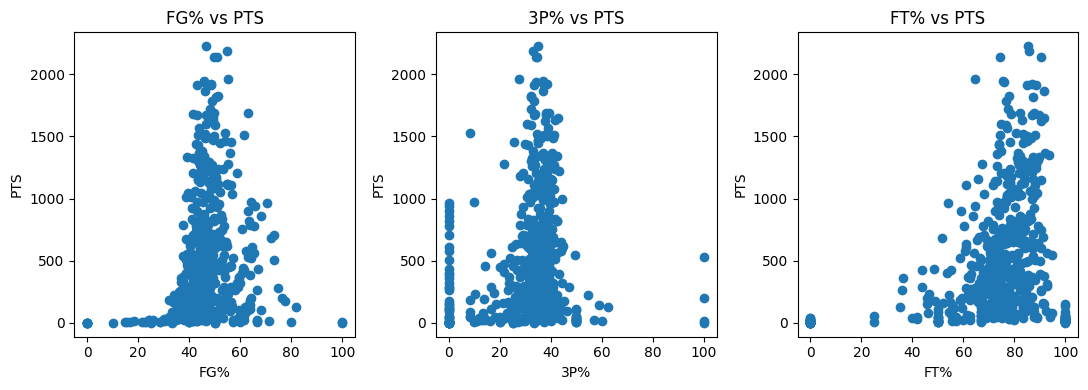

In [5]:
###############################################################################
# Scatter plots for research question 1 (RQ1)
# RQ1: Which offensive shooting percentage metric - 
#   field goal percentage (FG%), 
#   three-point percentage (3P%), 
#   or free throw percentage (FT%),
#   is most strongly associated with player average points per game, by position? 
###############################################################################
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
axs = axs.ravel()

# Offensive metrics vs PTS
axs[0].scatter(nba_player_stats['FG%'], nba_player_stats['PTS'])
axs[0].set_title('FG% vs PTS')
axs[0].set_xlabel('FG%')
axs[0].set_ylabel('PTS')

axs[1].scatter(nba_player_stats['3P%'], nba_player_stats['PTS'])
axs[1].set_title('3P% vs PTS')
axs[1].set_xlabel('3P%')
axs[1].set_ylabel('PTS')

axs[2].scatter(nba_player_stats['FT%'], nba_player_stats['PTS'])
axs[2].set_title('FT% vs PTS')
axs[2].set_xlabel('FT%')
axs[2].set_ylabel('PTS')

plt.tight_layout()
plt.show()


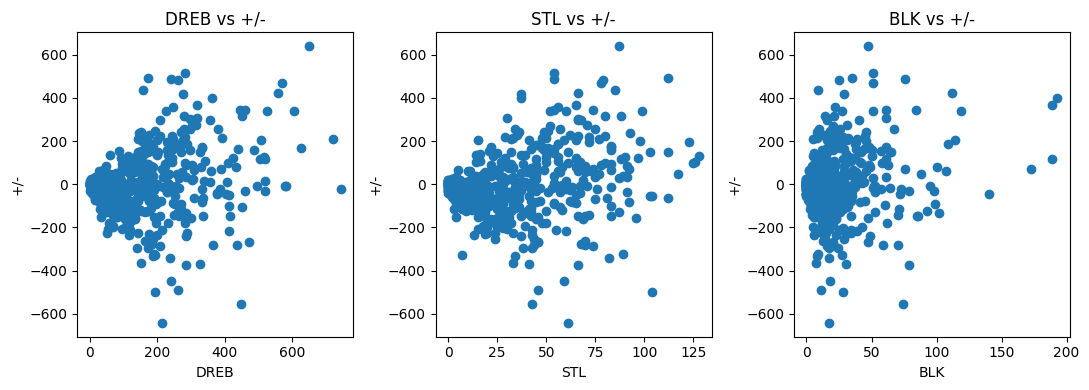

In [6]:
###############################################################################
# Scatter plots for Research Question 2 (RQ2)
# Which defensive metric - 
#   defensive rebounds (DREB), 
#   steals (STL),
#   or blocks (BLK),
#   is most strongly associated with a player’s average plus/minus per game, by position?
###############################################################################
fig, axs = plt.subplots(1, 3, figsize=(11, 4))
axs = axs.ravel()

axs[0].scatter(nba_player_stats['DREB'], nba_player_stats['+/-'])
axs[0].set_title('DREB vs +/-')
axs[0].set_xlabel('DREB')
axs[0].set_ylabel('+/-')

axs[1].scatter(nba_player_stats['STL'], nba_player_stats['+/-'])
axs[1].set_title('STL vs +/-')
axs[1].set_xlabel('STL')
axs[1].set_ylabel('+/-')

axs[2].scatter(nba_player_stats['BLK'], nba_player_stats['+/-'])
axs[2].set_title('BLK vs +/-')
axs[2].set_xlabel('BLK')
axs[2].set_ylabel('+/-')

plt.tight_layout()
plt.show()